Analyse voor Denver PD

Auteurs: Brandon, Sebastiaan, Mike en Bram

# Denver PD Feestdagen
Deze notebook geeft een overzicht van alle inzichten die zijn vergaard gedurende de eerste sprint van de tweede challenge.

# Business Understanding
------------------------
Vraag van de opdrachtgever: Hoe kunnen wij onze manschappen het best verdelen op feestdagen?

## Casus
Denver PD, het politiedepartement in de Amerikaanse stad Denver wil inzicht krijgen in hoe zij het beste hun manschappen kunnen inzetten op feestdagen. Het gaat hen dan met name om de volgende feestdagen: Memorial day, Independence Day, Thanksgiving en Labour Day.

## Project Plan
Het is lastig om in één keer de primaire businessvraag te beantwoorden omdat niet meteen bekend is hoe Denver PD zijn manschappen indeelt. Echter hebben we in overleg de volgende deelvragen opgesteld.

- Hoe verhoud het gemiddeld aantal incidenten op [feestdag] zich tot een gemiddelde dag?
- Hoe verhoud de verdeling van wijken waarin incidenten gebeuren zicht tussen [feestdag] en het gemiddelde?
- Hoe verhoud de verdeling van type incident zich tussen [feestdag] en het gemiddelde?

Zoals je ziet staat er in de deelvragen "[feestdag]". Dit komt omdat we voor elke feestdag de vraag gaan beantwoorden.

# Data Understanding
---
Voordat we kunnen beginnen met het beantwoorden van de vraag, gaan we eerst kijken naar de data die we aangeleverd hebben gekregen.

#### NOTE: De code hieronder zorgt dat de rest van het notebook werkt op zowel Mac als Windows

In [1]:
import platform
import os

# Get working directory
working_directory = os.getcwd()

# check if macos
isMac = "macos" in platform.platform().lower()

## Format
De data is aangeleverd in twee losse csv bestanden; crime.csv en offense_codes.csv. De bestanden zijn repectievelijk ±120 mb en ±35kb. 

NOTE: voeg de bestanden toe aan een mapje "data" onder de namen die hierboven staan.

In [2]:
# Variabele 
crime_file_path = (f"{working_directory}/data/crime.csv" if isMac else f"{working_directory}\\data\\crime.csv")
offense_file_path = f"{working_directory}/data/offense_codes.csv" if isMac else f"{working_directory}\\data\\offense_codes.csv"

## Data benaderen
De data kan worden benaderd met de paden die in bovenstaande cell staan. Dit doen we door ze in een Pandas Dataframe te stoppen, zoals hieronder. Hierna kun je in dit hele Jupyter Notebook gebruik maken van de dataframes.

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:


# Data in een dataframe te stoppen
crime_df = pd.read_csv(crime_file_path)
offense_df = pd.read_csv(offense_file_path)

## Data exploratie
Voor beide bestanden willen we eerst een globaal inzicht in de data. Hieronder gaan we ze een voor een bij langs.


### Crime.csv
Allereerst kijken we naar een csv bestand met daarin geregistreerde incidenten die zijn gebeurt in de stad Denver in Amerika.
Hieronder zie je hoeveel records er zijn (470278) en hoeveel kolommen (19). Ook zien we de (door pandas geïnterpreteerde) datatypes.

In [5]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470278 entries, 0 to 470277
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             470278 non-null  int64  
 1   offense_id              470278 non-null  int64  
 2   OFFENSE_CODE            470278 non-null  int64  
 3   OFFENSE_CODE_EXTENSION  470278 non-null  int64  
 4   OFFENSE_TYPE_ID         470278 non-null  object 
 5   OFFENSE_CATEGORY_ID     470278 non-null  object 
 6   FIRST_OCCURRENCE_DATE   470278 non-null  object 
 7   LAST_OCCURRENCE_DATE    174528 non-null  object 
 8   REPORTED_DATE           470278 non-null  object 
 9   INCIDENT_ADDRESS        432413 non-null  object 
 10  GEO_X                   466247 non-null  float64
 11  GEO_Y                   466247 non-null  float64
 12  GEO_LON                 466246 non-null  float64
 13  GEO_LAT                 466246 non-null  float64
 14  DISTRICT_ID         

De kolommen betekenen het volgende:

| Variabele              | Betekenis                                                                      |
|------------------------|--------------------------------------------------------------------------------|
| incident_id            | De identifier van het indicent                                                 |
| offense_id             | De identifier van de illegale activiteit                                       |
| OFFENSE_CODE           | De code van de illegale activiteit                                             |
| OFFENSE_CODE_EXTENSION | De extensie op de code van de illegale activiteit                              |
| OFFENSE_TYPE_ID        | De type van de illegale activiteit                                             |
| OFFENSE_CATEGORY_ID    | De category van de illegale activiteit                                         |
| FIRST_OCCURRENCE_DATE  | De datum van de eerste voorval van de illegale activiteit                      |
| LAST_OCCURRENCE_DATE   | De datum van de laatste voorval van de illegale activiteit                     |
| REPORTED_DATE          | De datum wanneer het incident is gerapporteerd                                 |
| INCIDENT_ADDRESS       | Het adres waar het incident heeft plaats gevonden                              |
| GEO_X                  | GEO code op de X as van het incident                                           |
| GEO_Y                  | GEO code op de Y as van het incident                                           |
| GEO_LON                | GEO longitude van het incident                                                 |
| GEO_LAT                | GEO latitude van het incident                                                  |
| DISTRICT_ID            | De identifier van de staat/staten waar het indicent zich heeft plaats gevonden |
| PRECINCT_ID            | De identifier van de area waar het indicent zich heeft plaats gevonden         |
| NEIGHBORHOOD_ID        | De identifier van de buurt waar het indicent zich heeft plaats gevonden        |
| IS_CRIME               | Of het incident wel of geen misdaad is                                         |
| IS_TRAFFIC             | Of het incident wel of geen verkeersongeval is                                 |

Hieronder zie je een overzicht van een aantal beschrijvende statistieken van de dataset.

In [6]:
crime_df.describe()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,IS_CRIME,IS_TRAFFIC
count,4.702780e+05,4.702780e+05,470278.000000,470278.000000,4.662470e+05,4.662470e+05,4.662460e+05,466246.000000,470277.000000,470277.000000,470278.000000,470278.000000
mean,4.585095e+09,4.585095e+15,3592.342408,0.209038,3.163137e+06,1.695337e+06,-1.049285e+02,39.721679,3.535121,371.170000,0.772800,0.227763
std,1.454714e+10,1.454714e+16,1624.156787,0.578655,6.431941e+05,2.183255e+05,1.793875e+00,0.679421,1.779745,178.910674,0.419023,0.419389
min,2.019600e+04,2.019652e+10,902.000000,0.000000,1.000000e+00,1.000000e+00,-1.154641e+02,0.000000,1.000000,111.000000,0.000000,0.000000
25%,2.017705e+09,2.017705e+15,2305.000000,0.000000,3.139282e+06,1.683173e+06,-1.050048e+02,39.707754,2.000000,221.000000,1.000000,0.000000
50%,2.019399e+09,2.019399e+15,2999.000000,0.000000,3.146122e+06,1.694794e+06,-1.049804e+02,39.739852,3.000000,323.000000,1.000000,0.000000
75%,2.021280e+09,2.021280e+15,5441.000000,0.000000,3.164298e+06,1.702249e+06,-1.049162e+02,39.760192,5.000000,521.000000,1.000000,0.000000
max,2.020890e+12,2.020890e+18,7399.000000,5.000000,4.067477e+07,1.046707e+08,5.000000e-07,39.904311,7.000000,759.000000,1.000000,1.000000


Hieronder zie je hoe een regel van de dataset eruit ziet.

In [7]:
crime_df.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,1/4/2022 11:30:00 AM,1/4/2022 12:00:00 PM,1/4/2022 8:36:00 PM,128 S CANOSA CT,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0
1,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 6:45:00 AM,NaN,1/3/2022 11:01:00 AM,650 15TH ST,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0
2,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 1:00:00 AM,NaN,1/3/2022 6:11:00 AM,919 E COLFAX AVE,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0
3,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 7:47:00 PM,NaN,1/3/2022 9:12:00 PM,2345 W ALAMEDA AVE,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0
4,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 5:06:00 PM,NaN,1/3/2022 8:31:00 PM,7800 E SMITH RD,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0


### Offense_codes.csv
Hieronder zie je een soortgelijk overzicht van de dataset met offense codes. Zoals je ziet zijn er 299 entries met 9 kolommen. Ook zien we de (door pandas geïnterpreteerde) datatypes. 

In [8]:
offense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   OBJECTID                299 non-null    int64 
 1   OFFENSE_CODE            299 non-null    int64 
 2   OFFENSE_CODE_EXTENSION  299 non-null    int64 
 3   OFFENSE_TYPE_ID         299 non-null    object
 4   OFFENSE_TYPE_NAME       299 non-null    object
 5   OFFENSE_CATEGORY_ID     299 non-null    object
 6   OFFENSE_CATEGORY_NAME   299 non-null    object
 7   IS_CRIME                299 non-null    int64 
 8   IS_TRAFFIC              299 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 21.1+ KB


De kolommen betekenen het volgende.

| Variabele              | Beschrijving                                  |
|------------------------|-----------------------------------------------|
| OBJECTID               | De identifier van de misdaad                  |
| OFFENSE_CODE           | De code van de misdaad                        |
| OFFENSE_CODE_EXTENSION | De extensie op de code van de misdaad         |
| OFFENSE_TYPE_ID        | De identifier van de type van de misdaad      |
| OFFENSE_TYPE_NAME      | De naam van de type van de misdaad            |
| OFFENSE_CATEGORY_ID    | De identifier van de categorie van de misdaad |
| OFFENSE_CATEGORY_NAME  | De naam van de categorie van de misdaad       |
| IS_CRIME               | Of de misdaad wel of geen misdaad is          |
| IS_TRAFFIC             | Of de misdaad wel of geen verkeersongeval is  |

Hieronder zie je een overzicht van een aantal beschrijvende statistieken van de dataset.

In [9]:
offense_df.describe()

,OBJECTID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,IS_CRIME,IS_TRAFFIC
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,150.000000,3368.886288,0.448161,0.979933,0.026756
std,86.458082,1784.546467,0.982987,0.140464,0.161640
min,1.000000,199.000000,0.000000,0.000000,0.000000
25%,75.500000,2100.000000,0.000000,1.000000,0.000000
50%,150.000000,2999.000000,0.000000,1.000000,0.000000
75%,224.500000,5015.500000,0.000000,1.000000,0.000000
max,299.000000,7399.000000,5.000000,1.000000,1.000000


Hieronder zie je hoe een regel van de dataset eruit ziet.

In [10]:
offense_df.head()

,OBJECTID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,1,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,3,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,4,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,5,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


Daarbij hebben we een overzicht van alle unieke offense types

In [11]:
offense_types = offense_df["OFFENSE_CATEGORY_ID"].unique()
print(f"Aantal unieke offense categoriën: {len(offense_types)}\nZie hieronder\n")
for type in offense_types:
    print(f"{type}")

Aantal unieke offense categoriën: 15
Zie hieronder

all-other-crimes
public-disorder
drug-alcohol
sexual-assault
other-crimes-against-persons
white-collar-crime
traffic-accident
murder
robbery
aggravated-assault
arson
burglary
larceny
theft-from-motor-vehicle
auto-theft


# Job Stories
Om deze deelvragen te beantwoorden hebben we ze omgevormd tot Job Stories

In [12]:
# Eerst maken we een genormaliseerde datum kolom aan.
# Hierdoor hebben we de datum zonder specifieke tijd, zo kunnen we per dag kijken naar de incidenten.
crime_df["REPORTED_DATE"] = pd.to_datetime(crime_df["REPORTED_DATE"])
crime_df["REPORTED_DATE_NORMALIZED"] = crime_df["REPORTED_DATE"].dt.normalize()

# hier pakken we alle data (hardcoded for now)
memorial_days = ['2017-05-29', '2018-05-28', '2019-05-27', '2020-05-25', '2021-05-31']
independence_days = ["2017-07-04","2018-07-04","2019-07-04","2020-07-04","2021-07-04"]
labour_days = ["2017-09-04", "2018-09-03", "2019-09-02", "2020-09-07", "2021-09-06"]
thanksgiving_days = ["2017-11-23","2018-11-22","2019-11-28","2020-11-26","2021-11-25"]

# Hier maken we per feestdag een dataframe met de data
memorial_days_df = pd.DataFrame()
memorial_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(memorial_days)
memorial_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(memorial_days_df["REPORTED_DATE_NORMALIZED"]).dt.normalize()

independence_days_df = pd.DataFrame()
independence_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(independence_days)
independence_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(independence_days_df["REPORTED_DATE_NORMALIZED"]).dt.normalize()

labour_days_df = pd.DataFrame()
labour_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(labour_days)
labour_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(labour_days_df["REPORTED_DATE_NORMALIZED"]).dt.normalize()

thanksgiving_days_df = pd.DataFrame()
thanksgiving_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(thanksgiving_days)
thanksgiving_days_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(thanksgiving_days_df["REPORTED_DATE_NORMALIZED"]).dt.normalize()



In [13]:
memday_crime = crime_df.copy()
indday_crime = crime_df.copy()
labday_crime = crime_df.copy()
thaday_crime = crime_df.copy()

memday_crime = pd.merge(memday_crime, memorial_days_df, on="REPORTED_DATE_NORMALIZED")
indday_crime = pd.merge(indday_crime, independence_days_df, on="REPORTED_DATE_NORMALIZED")
labday_crime = pd.merge(labday_crime, labour_days_df, on="REPORTED_DATE_NORMALIZED")
thaday_crime = pd.merge(thaday_crime, thanksgiving_days_df, on="REPORTED_DATE_NORMALIZED")

In [14]:
j1_memday_crime = memday_crime.copy()
j1_indday_crime = indday_crime.copy()
j1_labday_crime = labday_crime.copy()
j1_thaday_crime = thaday_crime.copy()


# Tel alle incidenten op per datum van de Memorial days. Daarna voeg je de jaar toe als een kolom samen met de type.
j1_memday_count = j1_memday_crime.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_memday_count["YEAR"] = j1_memday_count["REPORTED_DATE_NORMALIZED"].dt.year
j1_memday_count["TYPE"] = "Memorial Day"

j1_indday_count = j1_indday_crime.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_indday_count["YEAR"] = j1_indday_count["REPORTED_DATE_NORMALIZED"].dt.year
j1_indday_count["TYPE"] = "Independence Day"

j1_labday_count = j1_labday_crime.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_labday_count["YEAR"] = j1_labday_count["REPORTED_DATE_NORMALIZED"].dt.year
j1_labday_count["TYPE"] = "Labour Day"

j1_thaday_count = j1_thaday_crime.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_thaday_count["YEAR"] = j1_thaday_count["REPORTED_DATE_NORMALIZED"].dt.year
j1_thaday_count["TYPE"] = "Thanksgiving"

j1_total_count = crime_df.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_total_count.index = j1_total_count["REPORTED_DATE_NORMALIZED"]

j1_crime_mean = j1_total_count.groupby(pd.Grouper(freq='Y')).mean()
j1_crime_mean = j1_crime_mean.reset_index()
j1_crime_mean["size"] = j1_crime_mean["size"].round(0)
j1_crime_mean["YEAR"] = j1_crime_mean["REPORTED_DATE_NORMALIZED"].dt.year

j1_crime_mean["TYPE"] = "Gemiddeld"

j1_crime_mean

j1_total_mean = pd.concat([j1_memday_count, j1_indday_count, j1_labday_count, j1_thaday_count, j1_crime_mean])

j1_total_mean = j1_total_mean[j1_total_mean.YEAR != 2022]
j1_total_mean

,REPORTED_DATE_NORMALIZED,size,YEAR,TYPE
0,2017-05-29,256.0,2017,Memorial Day
1,2018-05-28,221.0,2018,Memorial Day
2,2019-05-27,221.0,2019,Memorial Day
3,2020-05-25,171.0,2020,Memorial Day
4,2021-05-31,236.0,2021,Memorial Day
0,2017-07-04,215.0,2017,Independence Day
1,2018-07-04,225.0,2018,Independence Day
2,2019-07-04,191.0,2019,Independence Day
3,2020-07-04,202.0,2020,Independence Day
4,2021-07-04,216.0,2021,Independence Day


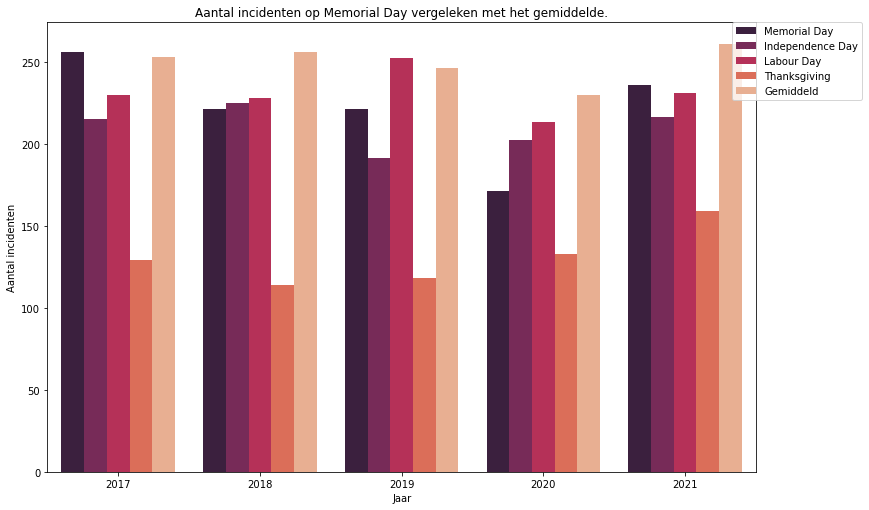

In [15]:
a4_dims = (12.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.barplot(ax=ax, data=j1_total_mean, x="YEAR", y="size", hue="TYPE", palette="rocket")
ax.set(xlabel="Jaar", ylabel="Aantal incidenten")
ax.set(title='Aantal incidenten op Memorial Day vergeleken met het gemiddelde.')

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', borderaxespad=0)
plt.show()